In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Screenshot 2025-05-07 204601.jpg to Screenshot 2025-05-07 204601.jpg


In [6]:
file_name = next(iter(uploaded))
img = Image.open(BytesIO(uploaded[file_name]))
img = img.convert('RGB')
img_np = np.array(img)
img_bgr = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)  # OpenCV uses BGR
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

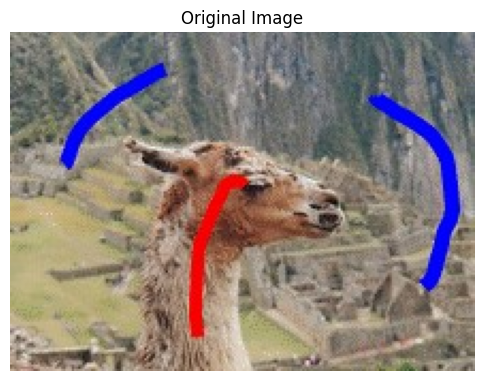

In [7]:
# Show original image
plt.figure(figsize=(6, 6))
plt.title("Original Image")
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

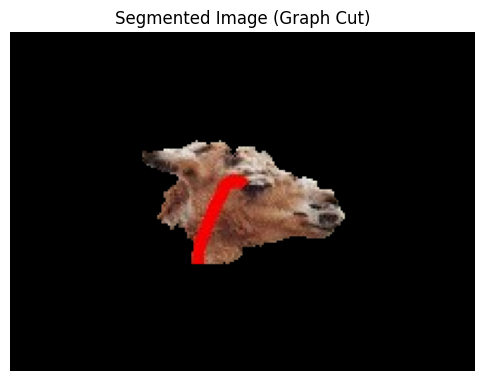

In [8]:
mask = np.zeros(img_bgr.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Rectangle around the object (you can tweak this)
rect = (50, 50, img_bgr.shape[1] - 100, img_bgr.shape[0] - 100)

# Apply GrabCut
cv2.grabCut(img_bgr, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Build final mask and segment
segmentation_mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
segmented_img = img_rgb * segmentation_mask[:, :, np.newaxis]

# Display result
plt.figure(figsize=(6, 6))
plt.title("Segmented Image (Graph Cut)")
plt.imshow(segmented_img)
plt.axis('off')
plt.show()